In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def simulate_ffi(v, a, alpha, x0, tau, scale=1., max_time=10, dt=0.001):
    """
    Simulates a single feedforward inhibition model run
    
    Parameters:
    -----------
    v       : drift rates
    a       : boundary separation
    alpha   : strength of feedforward inhibition
    x0      : starting points
    tau     : non-decision time
    dt      : step size
    scale   : scale of the process.
    max_time: time at which proccess is automatically terminated

    Returns:
    --------
    (y,c) - a tuple of response time (y-float) and a binary decision (c - int) 
    
    """
    num_steps = tau
    const =  scale*np.sqrt(dt)
    x = x0.copy()
    assert x.shape[0] == v.shape[0]
    J = x0.shape[0]
    
    while num_steps<=max_time:
        z = np.random.randn(J)
        for j in range(J):
            I = (alpha/(J-1)) * (sum(v)-v[j])
            dx_j = (v[j]-I)*dt+const*z[j]
            x[j] = max((x[j]+dx_j), 0)
        num_steps+=dt
        any_x_greater_than_a = False
        if any(x>=a):
            break
    return (round(num_steps,3), x.argmax())

In [16]:
def simulate_ffi_n(num_sims, v, a, alpha, x0, tau, scale=1., max_time=10, dt=0.001):
    """
    Simulates multiple feedforward inhibition model runs
    
    Parameters:
    -----------
    num_sims: the number of FFI runs to be simulated
    v       : drift rates
    a       : boundary separation
    alpha   : strength of feedforward inhibition
    x0      : starting points
    tau     : non-decision time
    dt      : step size
    scale   : scale of the process.
    max_time: time at which proccess is automatically terminated

    Returns:
    --------
    (y,c) - a tuple of response time (y-float) and a binary decision (c - int) 
    
    """
    data = np.zeros((num_sims, 2))
    for n in range(num_sims):
        data[n] = simulate_ffi(v, a, alpha, x0, tau, scale, max_time, dt)
    return data

In [17]:
params = {
    'v': np.array([1.,1.,1.]),
    'a': 1.,
    'alpha': 1.,
    'x0': np.array([0.,0.,0.]),
    'tau': 0.7
}

In [18]:
data = simulate_ffi(**params)
data

(1.062, 1)

In [24]:
datum = simulate_ffi_n(num_sims=3000,**params)

In [25]:
avg_response_time = datum.mean(axis=0)[0]
avg_response_time

1.1676296666666648

In [26]:
def visualize_ffi_model(data, figsize=(9,6)):
    """
    Visualizes the distribution of response times for a feedforward inhibition (FFI) model.

    Parameters:
    -----------
    data : numpy array
        Data array containing response times and corresponding labels.
    figsize : tuple, optional
        Figure size specified as a tuple (width, height). Default is (9, 6).

    Returns:
    --------
    f:  matplotlib.figure.Figure
        A matplotlib Figure object displaying the KDE plot of response times.
    """
    f, ax = plt.subplots(1, 1, figsize=figsize)
    for i in range(3):
        #label = 'Response' + i
        sns.kdeplot(data[:,0][data[:,1]==i], alpha=0.6, ax=ax, label= f'Response {i}')
    sns.despine(ax=ax)
    ax.set_xlabel('Response Time (s)', fontsize=18)
    ax.set_ylabel('')
    ax.legend(fontsize=18)
    ax.set_yticks([])
    return f

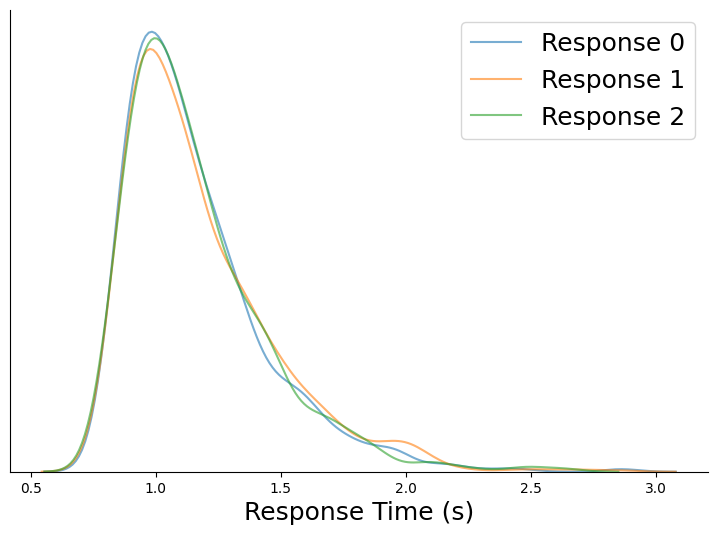

In [27]:
f = visualize_ffi_model(datum)

In [28]:
def visualize_ffi(v, a, alpha, x0, tau, scale=1., max_time=10, dt=0.001):
    """
    Parameters:
    -----------
    v       : drift rates
    a       : boundary separation
    alpha   : strength of feedforward inhibition
    x0      : starting points
    tau     : non-decision time
    dt      : step size
    scale   : scale of the process.
    max_time: time at which proccess is automatically terminated

    Returns:
    --------
    f - the figure representing the walks
    
    """
    num_steps = tau
    const =  scale*np.sqrt(dt)
    x = x0.copy()
    assert x.shape[0] == v.shape[0]
    J = x0.shape[0]
    datum = np.zeros((J, 1)).tolist()
    
    while num_steps<=max_time:
        z = np.random.randn(J)
        for j in range(J):
            I = (alpha/(J-1)) * (sum(v)-v[j])
            dx_j = (v[j]-I)*dt+const*z[j]
            x[j] = max((x[j]+dx_j), 0)
            datum[j].append(x[j])
        num_steps+=dt
        if any(x>=a):
            break
    palette = sns.color_palette("bright")
    f, ax = plt.subplots(1,1,figsize=(15,5))
    ax.set_ylim([0, 1])
    ax.set_xlabel('Time (ms)')
    sns.despine(ax=ax)
    for data in datum:
        ax.plot(data, alpha=0.5)
    return f

In [29]:
params = {
    'v': np.array([1.,1.,1.]),
    'a': 1.,
    'alpha': 1.,
    'x0': np.array([0.,0.,0.]),
    'tau': 0.7,
}

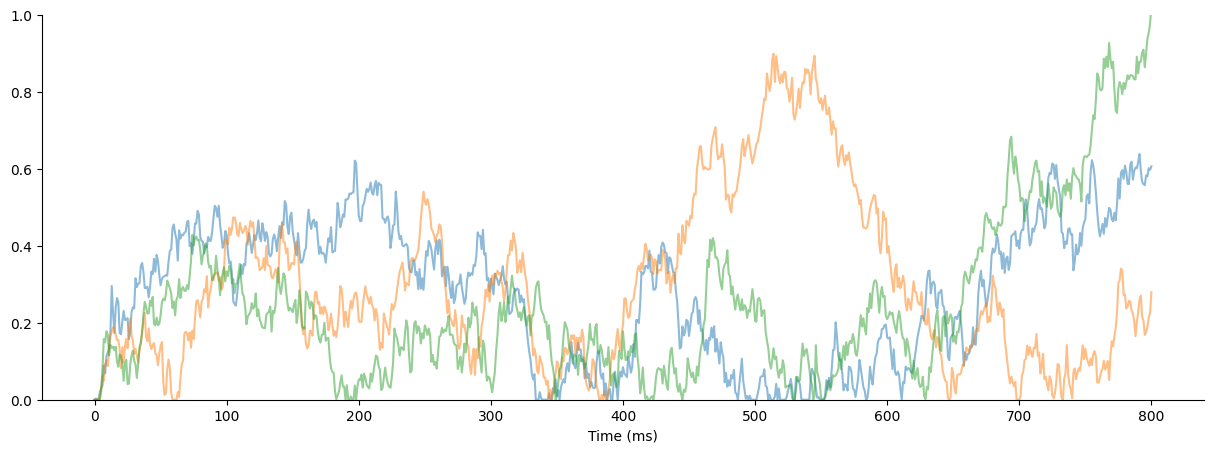

In [30]:
f = visualize_ffi(**params)

In [33]:
alphas = []
response_times = []
for i in range(45):
    alphas.append((i+1)/10)
    params = {
        'v': np.array([1.,1.,1.]),
        'a': 1.,
        'alpha': (i+1)/10,
        'x0': np.array([0.,0.,0.]),
        'tau': 0.7,
        'num_sims' : 100
    }
    avg_response_time = simulate_ffi_n(**params).mean(axis=0)[0]
    response_times.append(avg_response_time)
    print('alpha = ', (i+1)/10, 'response time = ' , avg_response_time)

alpha =  0.1 response time =  1.02205
alpha =  0.2 response time =  1.0547000000000002
alpha =  0.3 response time =  1.0013399999999997
alpha =  0.4 response time =  1.0673799999999998
alpha =  0.5 response time =  1.0691599999999999
alpha =  0.6 response time =  1.08357
alpha =  0.7 response time =  1.1390799999999996
alpha =  0.8 response time =  1.1128000000000002
alpha =  0.9 response time =  1.1688300000000003
alpha =  1.0 response time =  1.17405
alpha =  1.1 response time =  1.2108400000000004
alpha =  1.2 response time =  1.2859700000000003
alpha =  1.3 response time =  1.2878999999999998
alpha =  1.4 response time =  1.3682199999999998
alpha =  1.5 response time =  1.4299599999999995
alpha =  1.6 response time =  1.4378499999999996
alpha =  1.7 response time =  1.42404
alpha =  1.8 response time =  1.4452599999999998
alpha =  1.9 response time =  1.6658300000000006
alpha =  2.0 response time =  1.7150099999999995
alpha =  2.1 response time =  1.6204700000000003
alpha =  2.2 re

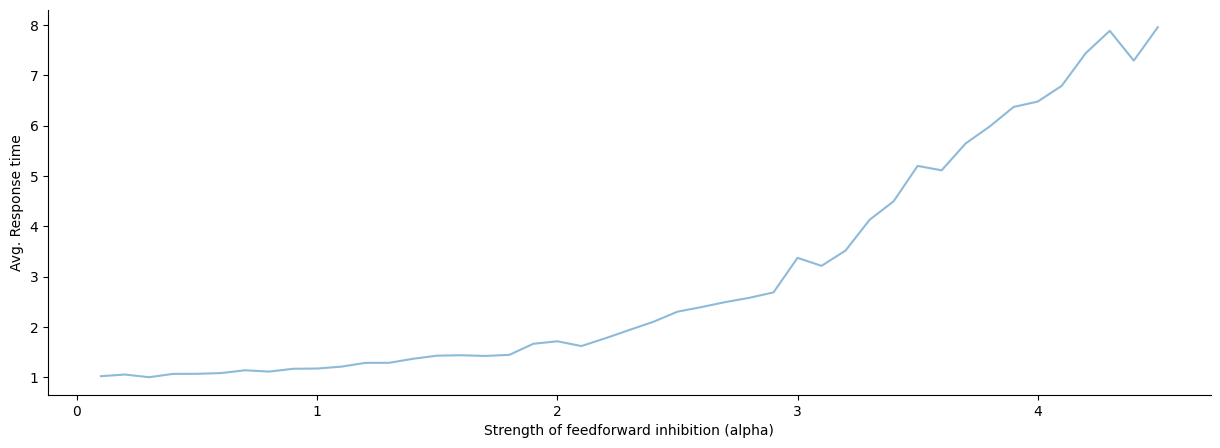

In [35]:
f, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_xlabel('Strength of feedforward inhibition (alpha)')
ax.set_ylabel('Avg. Response time')
sns.despine(ax=ax)
ax.plot(alphas, response_times, alpha=0.5)